In [1]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

import pandas as pd
import matplotlib.pyplot as plt

from utils.analysys_utils import list_experiments_in_dir

sns.set()

In [38]:
experiments_path = os.path.join(os.getcwd(), "runs", "momentum_train_size_exps", "sidarthe_extended", "Italy")
figs_path = os.path.join(experiments_path, "figs") 
if not os.path.exists(figs_path):
    os.makedirs(figs_path)
experiments = list_experiments_in_dir(experiments_path)


In [39]:
data = []
indexes = []


for exp in experiments:
    try: # avoid NaNs
        val_loss = exp['final']['best_epoch']['val_loss']
    except:
        val_loss = np.nan
        #print(f"{exp['uuid']}")
    momentum = exp['settings']['momentum']
    train_size = exp['settings']['train_size']
    
    if(momentum):
        m = exp['settings']['m']
    else:
        m = 'none'

    indexes.append((m,train_size))

    data.append({
        'val_loss': val_loss,
        "momentum": momentum,
        "train_size": train_size,
        "m": m
    })


index = pd.MultiIndex.from_tuples(indexes, names=['m','train_size'])
df = pd.DataFrame(data, index=index)
df

,,val_loss,momentum,train_size,m
m,train_size,,,,
0.0,80,227369.916756,True,80,0
none,80,65330.479712,False,80,none
0.0,40,85683.829559,True,40,0
0.1,100,14081.387628,True,100,0.1
0.30000000000000004,60,81338.556155,True,60,0.3
...,...,...,...,...,...
0.05,60,22317.384443,True,60,0.05
0.0,40,118652.669599,True,40,0
0.15000000000000002,80,36040.410287,True,80,0.15


In [40]:
df_mT = df.query("momentum")
df_mF = df.query("not momentum").reset_index(drop=True)

In [41]:
m_index = df_mT.index.unique('m').sort_values()
t_index = df_mT.index.unique('train_size').sort_values()

In [45]:
df_mF

,val_loss,momentum,train_size,m
0,6.533048e+04,False,80,none
1,1.398382e+07,False,80,none
2,1.634919e+06,False,100,none
3,1.047915e+05,False,100,none
4,5.568036e+04,False,100,none
5,1.030021e+05,False,40,none
6,6.117250e+04,False,60,none
7,9.666613e+04,False,60,none
8,1.467117e+06,False,40,none
9,3.526147e+06,False,60,none


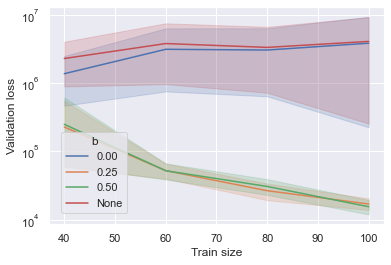

In [99]:
# plot by fixing m

pl, ax = plt.subplots()
ax.set_yscale('log')

for m in m_index[::5]:
    df_m = df_mT.loc[m]
    sns.lineplot(data=df_m, x='train_size', y='val_loss', ax=ax, legend="brief", label=f"{m:.2f}")

plot = sns.lineplot(data=df_mF, x='train_size', y='val_loss', ax=ax, label='None', legend='brief')

plot.set(xlabel="Train size", ylabel="Validation loss")
plot.get_legend().set_title("b")
plot.get_legend().set_bbox_to_anchor((0.25,0.45))
#print(dir(plot.get_legend()))
plot.get_figure().savefig(os.path.join(figs_path, "varying_tsize.pdf"))


In [31]:
# group by m and a with average
df_by_t_m = df.groupby(['m','train_size']).agg(['mean', 'count', 'std'])['val_loss']

#df_by_t_m['ci95_hi'] = df_by_t_m['mean'] + 1*96 * df_by_t_m['std'] / math.sqrt(df_by_t_m['count'])
df_by_t_m['ci95_hi'] = 1.96 * df_by_t_m['std'] / df_by_t_m['count'].pow(0.5)
df_by_t_m['ci95_lo'] = 1.96 * df_by_t_m['std'] / df_by_t_m['count'].pow(0.5)

df_by_t_m

mean  count           std       ci95_hi  \
m     train_size                                                    
-0.10 40          2.281103e+06     15  3.189451e+06  1.614085e+06   
      60          3.773729e+06     15  6.621474e+06  3.350928e+06   
      80          3.316570e+06     15  5.818401e+06  2.944517e+06   
      100         4.056209e+06     15  8.650905e+06  4.377962e+06   
 0.00 40          1.368944e+06     15  1.991833e+06  1.008006e+06   
      60          3.111778e+06     15  6.012191e+06  3.042588e+06   
      80          3.034982e+06     15  5.545119e+06  2.806218e+06   
      100         3.819171e+06     15  8.832435e+06  4.469829e+06   
 0.05 40          2.683936e+05     15  4.911287e+05  2.485454e+05   
      60          8.105517e+04     15  1.226845e+05  6.208695e+04   
      80          4.741125e+04     15  7.883064e+04  3.989381e+04   
      100         1.814961e+04     15  1.259243e+04  6.372646e+03   
 0.10 40          8.856876e+04     15  8.613603e+04  4.359085e+04   
      60          5.070661e+04     15  2.736999e+04  1.385113e+04   
      80          3.137928e+04     15  1.767189e+04  8.943211e+03   
      100         1.361428e+04     15  6.716988e+03  3.399265e+03   
 0.15 40          6.689419e+04     15  2.551935e+04  1.291457e+04   
      60          4.739690e+04     15  2.687948e+04  1.360289e+04   
      80          2.870784e+04     15  1.861284e+04  9.419395e+03   
      100         1.491178e+04     15  5.992747e+03  3.032748e+03   
 0.20 40          1.230686e+05     15  2.084058e+05  1.054679e+05   
      60          4.989476e+04     15  2.536647e+04  1.283720e+04   
      80          2.799019e+04     15  1.597906e+04  8.086518e+03   
      100         1.702587e+04     15  8.144340e+03  4.121604e+03   
 0.25 40          2.276578e+05     15  6.184663e+05  3.129871e+05   
      60          5.250459e+04     15  2.628715e+04  1.330313e+04   
      80          2.672695e+04     15  1.506288e+04  7.622870e+03   
      100         1.708849e+04     15  6.667623e+03  3.374283e+03   
 0.30 40          2.888657e+05     15  8.665927e+05  4.385564e+05   
      60          5.637818e+04     15  2.907409e+04  1.471352e+04   
      80          2.938733e+04     15  1.177265e+04  5.957780e+03   
      100         1.725240e+04     15  9.166947e+03  4.639115e+03   
 0.35 40          2.743580e+05     15  8.059451e+05  4.078645e+05   
      60          5.493605e+04     15  3.150087e+04  1.594164e+04   
      80          2.921238e+04     15  1.170556e+04  5.923830e+03   
      100         1.786047e+04     15  8.989121e+03  4.549123e+03   
 0.40 40          2.638745e+05     15  7.610773e+05  3.851583e+05   
      60          5.567768e+04     15  2.920749e+04  1.478103e+04   
      80          2.827126e+04     15  1.346034e+04  6.811871e+03   
      100         1.756512e+04     15  1.042233e+04  5.274425e+03   
 0.45 40          2.570255e+05     15  7.280610e+05  3.684497e+05   
      60          5.381723e+04     15  2.890117e+04  1.462601e+04   
      80          2.787535e+04     15  1.314981e+04  6.654721e+03   
      100         1.597798e+04     15  7.504759e+03  3.797932e+03   
 0.50 40          2.495448e+05     15  6.989165e+05  3.537005e+05   
      60          5.236686e+04     15  2.764562e+04  1.399061e+04   
      80          3.085628e+04     15  1.626702e+04  8.232245e+03   
      100         1.558632e+04     15  7.975586e+03  4.036203e+03   

                       ci95_lo  
m     train_size                
-0.10 40          1.614085e+06  
      60          3.350928e+06  
      80          2.944517e+06  
      100         4.377962e+06  
 0.00 40          1.008006e+06  
      60          3.042588e+06  
      80          2.806218e+06  
      100         4.469829e+06  
 0.05 40          2.485454e+05  
      60          6.208695e+04  
      80          3.989381e+04  
      100         6.372646e+03  
 0.10 40          4.359085e+04  
      60          1.385113e+04  
      80          8.943211e+03  
      100     

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5F88D8F48>,
      dtype=object)

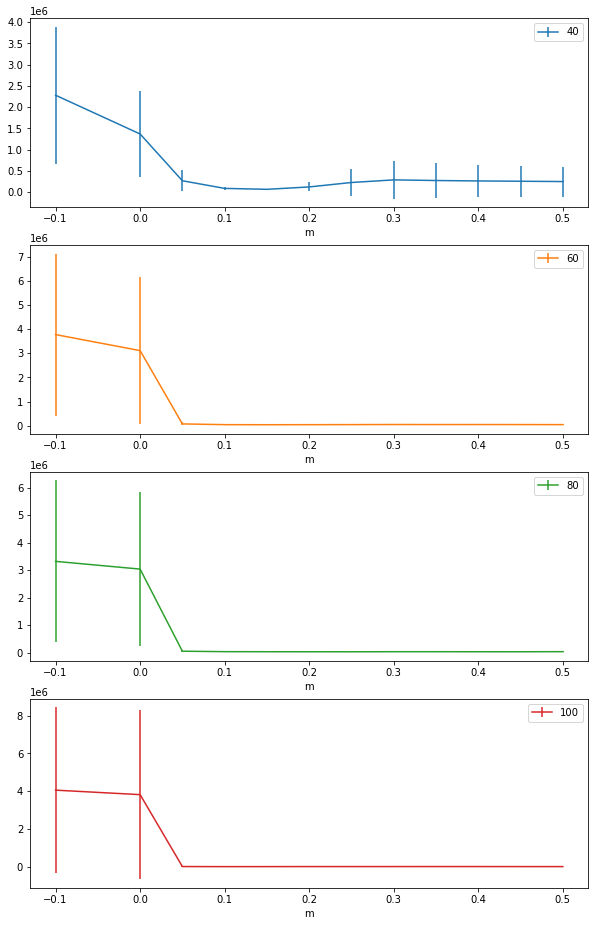

In [34]:
df_by_t_m[['mean', 'ci95_hi']].unstack().plot(y='mean', subplots=True, figsize=(10, 16), sharex=False, yerr='ci95_hi')